# MODULE END PROJECT

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Documents/Companydata.csv')
df['height'] = np.random.randint(150, 181, size=len(df))

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.1+ KB
None
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   2

In [3]:
# 1. Employee Distribution by Team

team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

print(pd.DataFrame({
    'Employee Count': team_distribution,
    'Percentage': team_percentage.round(3)
}))

                        Employee Count  Percentage
Team                                              
New Orleans Pelicans                19       4.148
Memphis Grizzlies                   18       3.930
Utah Jazz                           16       3.493
New York Knicks                     16       3.493
Milwaukee Bucks                     16       3.493
Brooklyn Nets                       15       3.275
Portland Trail Blazers              15       3.275
Oklahoma City Thunder               15       3.275
Denver Nuggets                      15       3.275
Washington Wizards                  15       3.275
Miami Heat                          15       3.275
Charlotte Hornets                   15       3.275
Atlanta Hawks                       15       3.275
San Antonio Spurs                   15       3.275
Houston Rockets                     15       3.275
Boston Celtics                      15       3.275
Indiana Pacers                      15       3.275
Detroit Pistons                

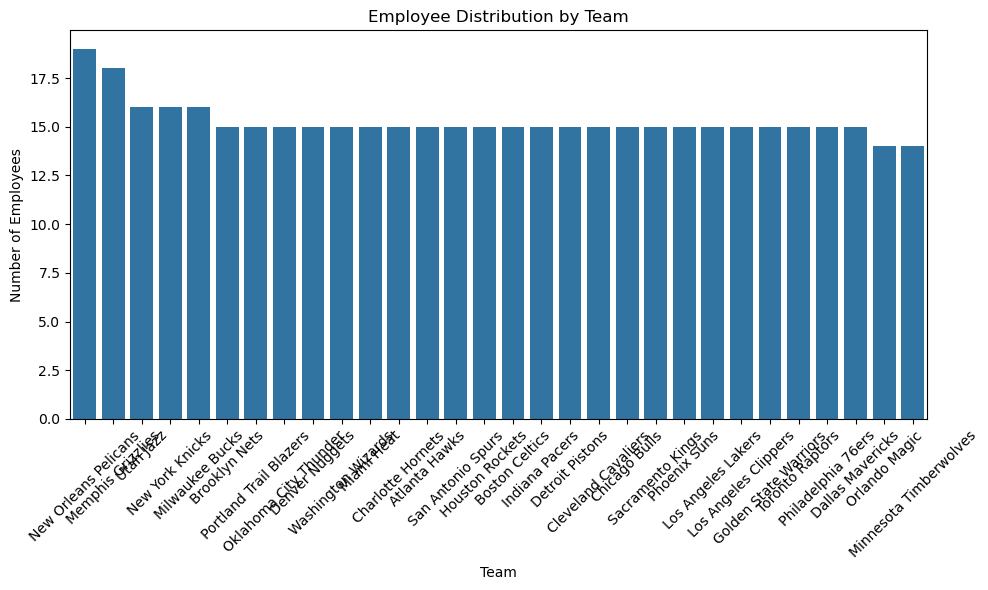

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Team', data=df, order=team_distribution.index)
plt.title('Employee Distribution by Team')
plt.xticks(rotation=45)
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

In [5]:
# 2. Segregate Employees by Position

position_counts = df['Position'].value_counts()
print(position_counts)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


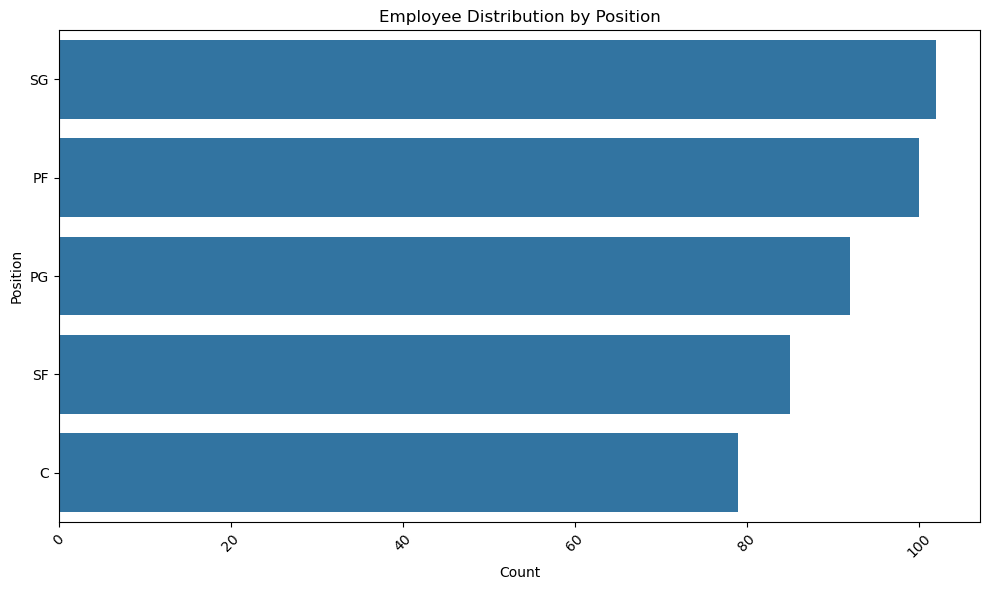

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Position', data=df, order=position_counts.index)
plt.title('Employee Distribution by Position')
plt.xticks(rotation=45)
plt.xlabel('Count' )
plt.tight_layout()
plt.show()

In [7]:
# 3. Predominant Age Group

bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

age_group
20-29    334
30-39    119
40-49      3
50-59      0
60-69      0
Name: count, dtype: int64


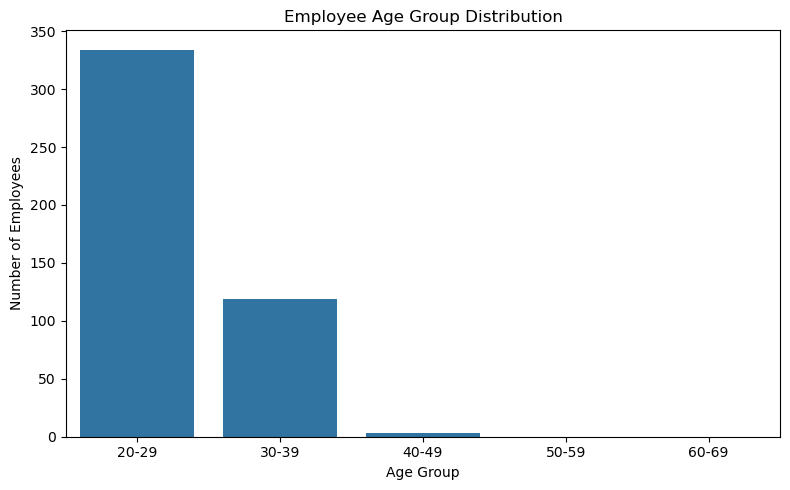

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Employee Age Group Distribution')
plt.ylabel('Number of Employees')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

In [9]:
# 4. Highest Salary Expenditure by Team and Position

team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print("Top Team by Salary Expenditure:", team_salary.head(1))

Top Team by Salary Expenditure: Team
Cleveland Cavaliers    106988689.0
Name: Salary, dtype: float64


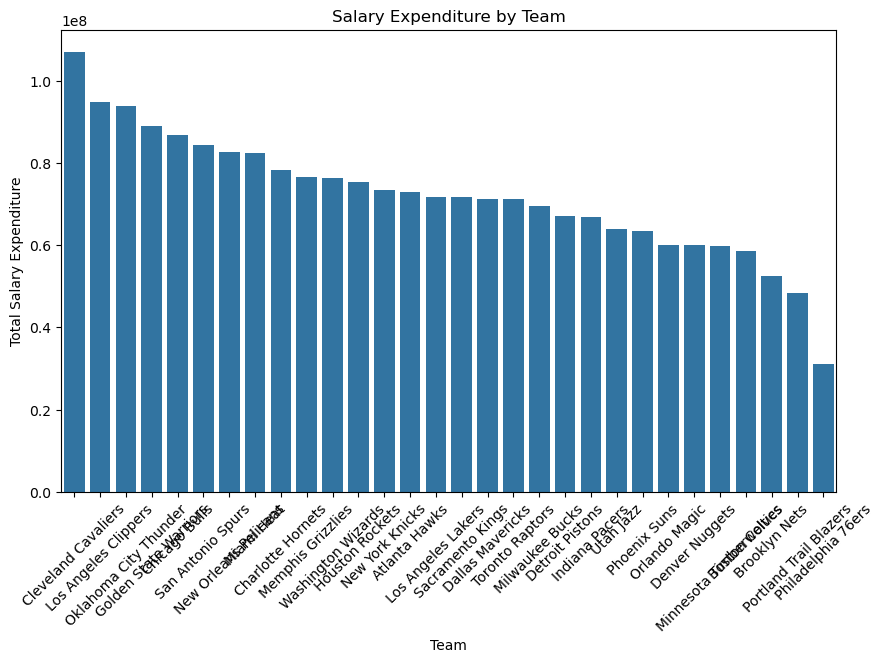

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=team_salary.index, y=team_salary.values)
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

In [47]:
# 5. Correlation Between Age and Salary

correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")

Correlation between Age and Salary: 0.21


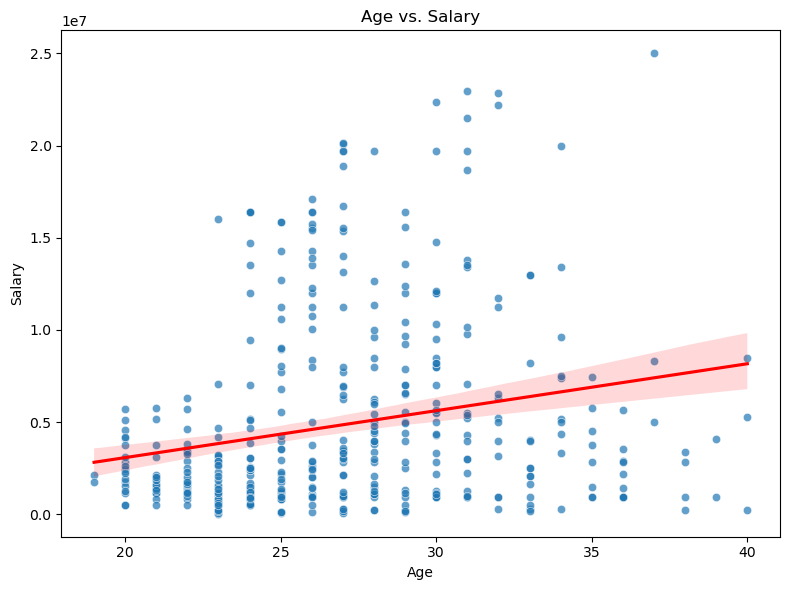

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary', alpha=0.7)
sns.regplot(data=df, x='Age', y='Salary', scatter=False, color='red')
plt.title('Age vs. Salary')
plt.tight_layout()
plt.show()

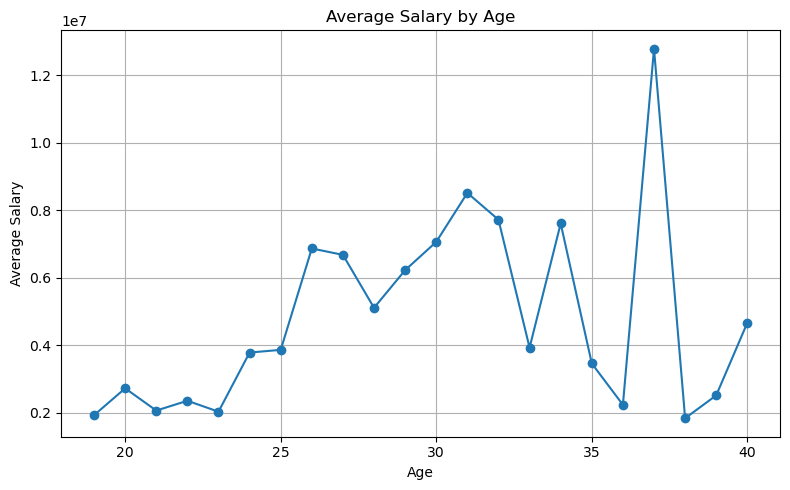

In [51]:
avg_salary_by_age = df.groupby('Age')['Salary'].mean()

plt.figure(figsize=(8, 5))
avg_salary_by_age.plot(kind='line', marker='o')
plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Story

In [12]:
#Team New Orleans Pelicans having the highest number of Employees.
#Teams Orlando Magic and Minnesota Timberwolves having the least number of employees.
#Position SG had the highest representation, suggesting it plays a central role in the company’s operations.
#The most predominant age group was 20-29 years, followed by the 30-39 range.
#The team with the highest salary expenditure was Team Cleveland Cavaliers.